In [1]:
# Import Dependencies
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

### Read in Preprocessed Data

In [2]:
# Read in Titanic Dataset to Pandas DataFrame
preprocessed_df = pd.read_csv("Data/DataPreprocessing.csv")
preprocessed_df.head()

,Survived,Age,Sibsp,Parch,Pclass,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Cabin_Location_Neither,Cabin_Location_Port,Cabin_Location_Starboard
0,0,22.0,1,0,3,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,38.0,1,0,1,71.2833,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,26.0,0,0,3,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,35.0,1,0,1,53.1000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,3,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [3]:
# Split data into features and target
X = preprocessed_df.drop("Survived", axis=1)
y = preprocessed_df["Survived"]

# Split preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Machine Learning Model

In [5]:
# Create a GBC classifier object and determine best learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=42)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.887
Accuracy score (validation): 0.854

Learning rate:  0.1
Accuracy score (training): 0.897
Accuracy score (validation): 0.854

Learning rate:  0.25
Accuracy score (training): 0.924
Accuracy score (validation): 0.860

Learning rate:  0.5
Accuracy score (training): 0.947
Accuracy score (validation): 0.863

Learning rate:  0.75
Accuracy score (training): 0.958
Accuracy score (validation): 0.851

Learning rate:  1
Accuracy score (training): 0.971
Accuracy score (validation): 0.835

Learning rate:  1.25
Accuracy score (training): 0.973
Accuracy score (validation): 0.811



In [6]:
# 0.5 best learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=100,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=42)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head()

,Prediction,Actual
1148,0,0
1049,0,0
982,0,0
808,0,0
1195,1,1


In [7]:
# Create a DataFrame from the confusion matrix.
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Died", "Actual Survived"], columns=["Predicted Died", "Predicted Survived"])

cm_df

,Predicted Died,Predicted Survived
Actual Died,178,19
Actual Survived,26,105


In [8]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score*100:.2f}%")

Accuracy Score : 86.28%


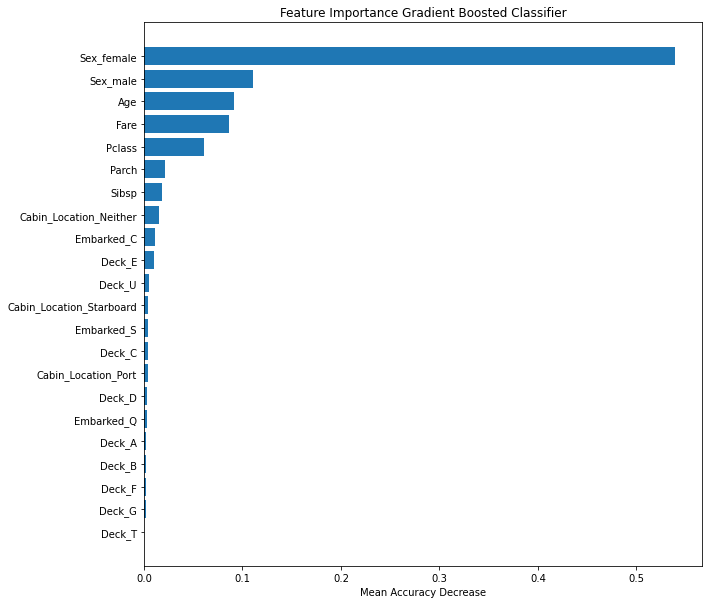

In [16]:
# Graph Feature Importances
features = sorted(zip(X.columns, classifier.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)

ax.barh(y=cols, width=width)
ax.set_title("Feature Importance Gradient Boosted Classifier")
ax.set_xlabel("Mean Accuracy Decrease")

plt.show()